# Data Viz - Kickstarter Projects

By: Rodrigo Hernández Mota

In [82]:
%matplotlib inline

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Utils

In [83]:
def count_operation(df, variable):
    return (df.groupby(variable)[variable].count()
                .to_frame()
                .rename(columns={variable: "count"})
                .sort_values("count", ascending=False))

## Read the data

In [84]:
data_path = "data"
file_name = os.listdir(data_path)[0]

print("* Data relative path: {path}\n* File name: {name}".format(path=data_path, name=file_name))

* Data relative path: data
* File name: ks-projects-201801.csv


In [85]:
class Data(object):
    
    def __init__(self, file_path, file_name): 
        self.path = file_path
        self.name = file_name
        self.location = os.path.join(file_path, file_name)
        self.df = None
        
    def load(self, encoding="utf-8"):
        df = pd.read_csv(self.location, encoding=encoding)
        del_cols = list(filter(lambda x: "Unnamed" in x, df.columns))
        self.df = df.drop(del_cols, axis=1)

In [86]:
data = Data(data_path, file_name)
data.load()

data.df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [87]:
data.df.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [88]:
data.df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


## Response variable

We are interested in the **state** column. 

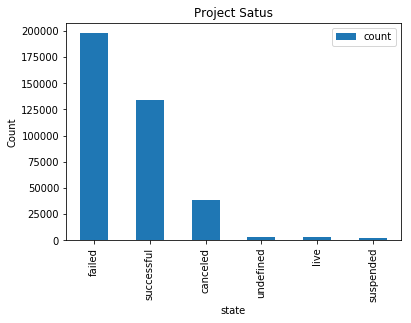

In [89]:
count_operation(data.df, "state").plot.bar()

plt.title("Project Satus")
plt.ylabel("Count")
plt.show()

We are going to define a binary target variable whose value is 1 if the project is successful and 0 any other value. 

In [90]:
data.df["target"] = data.df.state == "successful"

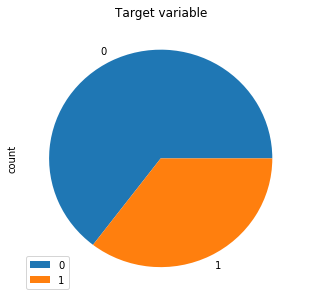

In [91]:
count_operation(data.df, "target").reset_index().plot.pie(x="target", y="count", figsize=(5, 5))

plt.title("Target variable")
plt.show()

## Columns (features)

### Category

In [92]:
data.df.category.unique()

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

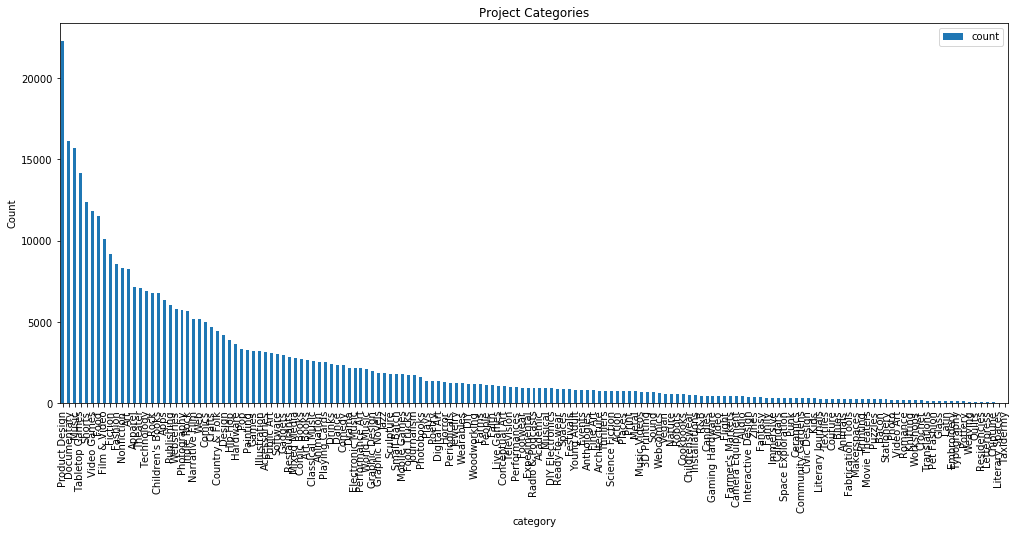

In [93]:
count_operation(data.df, "category").plot.bar(figsize=(17, 7))

plt.title("Project Categories")
plt.ylabel("Count")
plt.show()

In [94]:
total_count = data.df.shape[0]
categories_other = (count_operation(data.df, "category").cumsum(0) / total_count).query("count > 0.90").index.values
data.df["category"] = data.df.category.apply(lambda x: x if x not in categories_other else "other", 1)

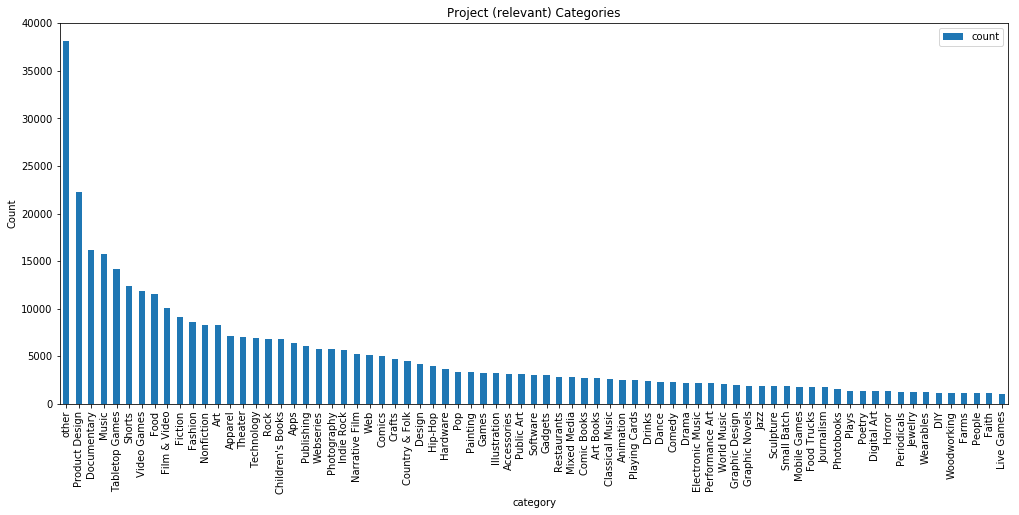

In [95]:
count_operation(data.df, "category").plot.bar(figsize=(17, 7))

plt.title("Project (relevant) Categories")
plt.ylabel("Count")
plt.show()

### Main Category

In [37]:
data.df.main_category.unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

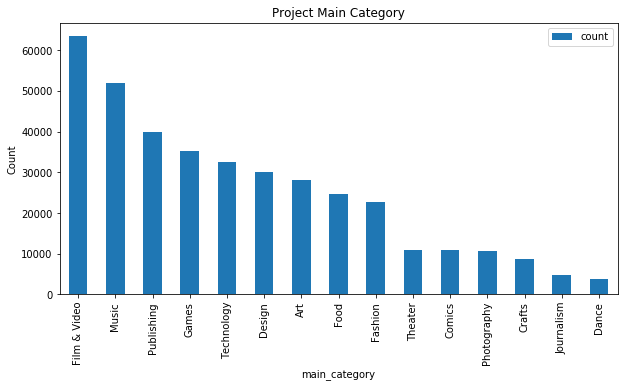

In [38]:
count_operation(data.df, "main_category").plot.bar(figsize=(10, 5))

plt.title("Project Main Category")
plt.ylabel("Count")
plt.show()

### Currency

In [39]:
data.df.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

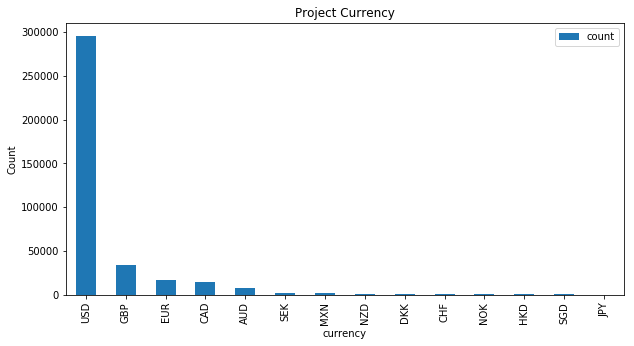

In [40]:
count_operation(data.df, "currency").plot.bar(figsize=(10, 5))

plt.title("Project Currency")
plt.ylabel("Count")
plt.show()

In [44]:
total_count = data.df.shape[0]
currency_other = (count_operation(data.df, "currency").cumsum(0) / total_count).query("count > 0.8").index.values
data.df["currency"] = data.df.currency.apply(lambda x: x if x not in currency_other else "other", 1)

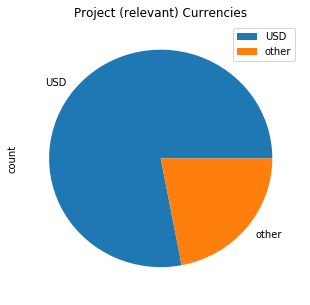

In [45]:
count_operation(data.df, "currency").plot.pie(x="currency", y="count", figsize=(5, 5))

plt.title("Project (relevant) Currencies")
plt.show()

### Deadline

In [117]:
data.df["deadline"] = pd.to_datetime(data.df.deadline)

### Launched

In [118]:
data.df["launched"] = pd.to_datetime(data.df.launched)

### Goal

The goal variable represents the ideal funding needed in order to continue with the project. 

In [165]:
data.df.goal.describe()

count    3.786610e+05
mean     4.908079e+04
std      1.183391e+06
min      1.000000e-02
25%      2.000000e+03
50%      5.200000e+03
75%      1.600000e+04
max      1.000000e+08
Name: goal, dtype: float64

As it can be seen, the range of the variable is considerably large. Also, the difference among the differences among the percentiles lower than 50% is less than the ones grater than 50%. A log-transformation might be needed. 

In [166]:
data.df["goal"] = np.log(data.df.goal)

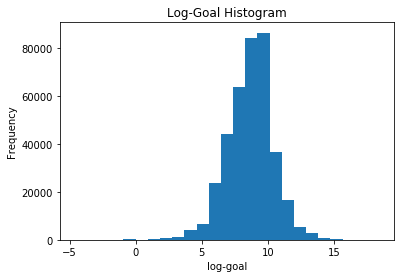

In [167]:
data.df.goal.plot.hist(bins=25)

plt.title("Log-Goal Histogram")
plt.xlabel("log-goal")
plt.show()

### Pledge

In [168]:
data.df.pledged.describe()

count    3.786610e+05
mean     9.682979e+03
std      9.563601e+04
min      0.000000e+00
25%      3.000000e+01
50%      6.200000e+02
75%      4.076000e+03
max      2.033899e+07
Name: pledged, dtype: float64

Same procedure as described with the goal variable. 

In [171]:
data.df["pledged"] = np.power(data.df.pledged, 1/16)

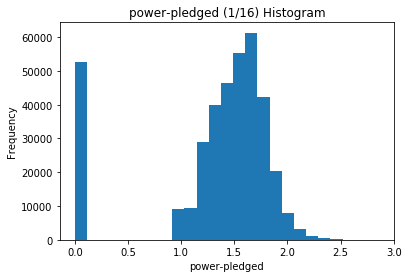

In [172]:
data.df.pledged.plot.hist(bins=25)

plt.title("power-pledged (1/16) Histogram")
plt.xlabel("power-pledged")
plt.show()

### Backers

In [186]:
data.df.backers.describe()

count    378661.000000
mean        105.617476
std         907.185035
min           0.000000
25%           2.000000
50%          12.000000
75%          56.000000
max      219382.000000
Name: backers, dtype: float64

In [187]:
data.df["backers"] = np.power(data.df.backers, 1/16)

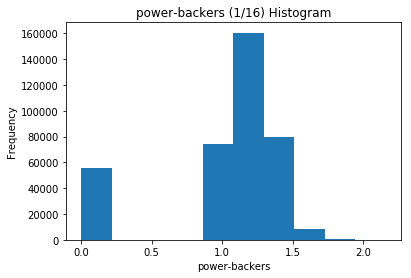

In [189]:
data.df.backers.plot.hist()

plt.title("power-backers (1/16) Histogram")
plt.xlabel("power-backers")
plt.show()

### Country

In [191]:
data.df.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

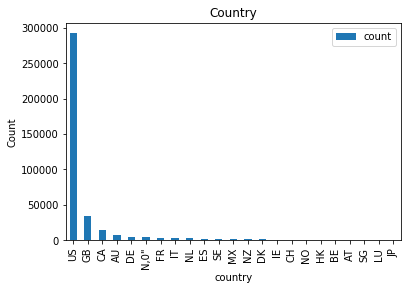

In [193]:
count_operation(data.df, "country").plot.bar()

plt.title("Country")
plt.ylabel("Count")
plt.show()

## Feature Generation

### Delta Time (Deadline - Launched)

In [119]:
data.df["time_delta"] = (data.df.deadline - data.df.launched).apply(lambda x: x.days, 1)

In [120]:
data.df.time_delta.describe()

count    378661.000000
mean         33.481122
std          65.909172
min           0.000000
25%          29.000000
50%          29.000000
75%          36.000000
max       16738.000000
Name: time_delta, dtype: float64

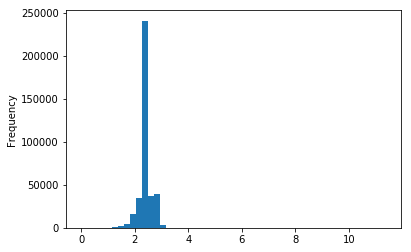

In [121]:
np.power(data.df.time_delta, 1/4).plot.hist(bins=50)

## Final Dataset Transform

In [115]:
class Transform(object):
    def __init__(self, op, name):
        self.op = op 
        self.name = name
    
    def apply_single(self, x):
        return self.op(x)
    
    def apply(self, vals):
        return np.vectorize(self.op)(vals)
    
def identity(name):
    return Transform(lambda x: x, name)

def to_datetime(name):
    return Transform(lambda x: pd.to_datetime(x), name)

def log_transform(name):
    return Transform(np.log, name)

def power_transform(name, power):
    return Transform(lambda x: np.power(x, power), name)

In [129]:
# Define dataset operations

target_variable = "target"

feature_transform = {
    "category":      Transform(lambda x: x if x not in categories_other else "other", "relevant_category"),
    "main_category": identity("main_category"),
    "currency":      Transform(lambda x: x if x=="USD" else "other", "relevant_currency"),
    "deadline":      to_datetime("del_deadline"),
    "launched":      to_datetime("del_launched"),
    "goal":          log_transform("log_goal"),
    "pledged":       power_transform("root_16_pledged", 1/16),
    "backers":       power_transform("root_16_backers", 1/16)
}

feature_generation = {
    "time_delta": lambda df: (df.del_deadline - df.del_launched).apply(lambda x: x.days, 1)
}


In [131]:
# Create final dataset

final_data = pd.DataFrame([])

# Perform feature transformations
for transform in feature_transform:
    final_data[feature_transform[transform].name] = feature_transform[transform].apply(data.df[transform])
    del data.df[transform]

# Perform feature generation
for generate in feature_generation:
    final_data[generate] = feature_generation[generate](final_data)

# Delete del_ columns
final_data = final_data.drop([c for c in final_data.columns if "del_" in c], 1)

# Add target variable
final_data[target_variable] = data.df[target_variable]
del data

final_data.head()

,relevant_category,log_goal,del_launched,main_category,root_16_pledged,del_deadline,root_16_backers,relevant_currency,time_delta,target
0,Poetry,6.907755,2015-08-11 12:12:28,Publishing,0.000000,2015-10-09,0.000000,other,58,False
1,Narrative Film,10.308953,2017-09-02 04:43:57,Film & Video,1.627420,2017-11-01,1.184420,USD,59,False
2,Narrative Film,10.714418,2013-01-12 00:20:50,Film & Video,1.400882,2013-02-26,1.071075,USD,44,False
3,Music,8.517193,2012-03-17 03:24:11,Music,1.000000,2012-04-16,1.000000,USD,29,False
4,Film & Video,9.878170,2015-07-04 08:35:03,Film & Video,1.564099,2015-08-29,1.179324,USD,55,False
